In [1]:
from census import Census
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

# Census & gmaps API Keys
from config import (census_key, gkey)
c = Census(census_key, year=2019)

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Add in UnEmployment Rate (UnEmployment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["State", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]

census_pd.head(70)

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,01,Alabama,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,2.708946
1,02,Alaska,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,3.637114
2,04,Arizona,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,2.778676
3,05,Arkansas,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,2.349860
4,06,California,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,3.052765
5,08,Colorado,5610349.0,36.7,72331.0,38226.0,565873.0,10.086235,2.341583
6,10,Delaware,957248.0,40.6,68287.0,35450.0,109400.0,11.428595,2.766368
7,11,District of Columbia,692683.0,34.0,86420.0,56147.0,107140.0,15.467393,4.037489
8,09,Connecticut,3575074.0,41.0,78444.0,44496.0,344146.0,9.626262,3.257443
9,12,Florida,20901636.0,42.0,55660.0,31619.0,2870487.0,13.733313,2.686144


In [3]:
# df = pd.read_csv("./patent.tsv", sep="\t", nrows = 500 )
df = pd.read_csv("csv_patent_2019/all_inventors.csv")

C:\Users\gongl\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,application_number,inventor_name_first,inventor_name_middle,inventor_name_last,inventor_rank,inventor_city_name,inventor_region_code,inventor_country_code
0,5692088,TROY,E.,PLUNK,1,Bedford,MA,US
1,5692088,JAMES,E.,HOPSON,2,Wellesley,MA,US
2,5692179,PIETRO,,VENTRESCA,1,Littleton,MA,US
3,5692179,FRANCIS,J.,O'HARA,2,Bedford,MA,US
4,5692179,CHESTER,J.,HUNT,3,Melrose,MA,US


In [5]:
df = df.drop(['inventor_name_middle'], axis=1)
# df.dropna()

In [6]:
# # most strict 

# df_nona = df.loc[(df["inventor_city_name"].map(pd.isna) == False) 
#                 & (df["inventor_region_code"].map(pd.isna) == False)
#                 & (df["inventor_country_code"].map(pd.isna) == False)
#                 , :]

# df_nona


In [34]:
# df.count()

In [7]:
# only focus on countries
df_c_nona = df.loc[(df["inventor_country_code"].map(pd.isna) == False), :]
df_c_nona

,application_number,inventor_name_first,inventor_name_last,inventor_rank,inventor_city_name,inventor_region_code,inventor_country_code
0,5692088,TROY,PLUNK,1,Bedford,MA,US
1,5692088,JAMES,HOPSON,2,Wellesley,MA,US
2,5692179,PIETRO,VENTRESCA,1,Littleton,MA,US
3,5692179,FRANCIS,O'HARA,2,Bedford,MA,US
4,5692179,CHESTER,HUNT,3,Melrose,MA,US
...,...,...,...,...,...,...,...
29233623,15981088,Se Mi,JANG,1,Changwon-si,NaN,KR
29233624,16316883,Hernan,De La Vega,1,Neckarsulm,NaN,DE
29233625,16316883,Denis,Cichuta,2,Neckarsulm,NaN,DE
29233626,16316883,Christine,Wolff,3,Neckarsulm,NaN,DE


In [8]:
c = df_c_nona.groupby(['application_number', 'inventor_country_code']).count()
c

,,inventor_name_first,inventor_name_last,inventor_rank,inventor_city_name,inventor_region_code
application_number,inventor_country_code,,,,,
4839798,US,4,4,4,4,4
4840815,US,1,1,1,1,1
5057868,DE,3,3,3,3,0
5154777,US,1,1,1,1,1
5163565,US,1,1,1,1,1
...,...,...,...,...,...,...
PCT/US19/42742,US,4,4,4,4,4
PCT/US19/42745,US,4,4,4,4,4
PCT/US19/45039,IL,3,3,3,3,0


In [9]:
c = c.reset_index()
c

,application_number,inventor_country_code,inventor_name_first,inventor_name_last,inventor_rank,inventor_city_name,inventor_region_code
0,4839798,US,4,4,4,4,4
1,4840815,US,1,1,1,1,1
2,5057868,DE,3,3,3,3,0
3,5154777,US,1,1,1,1,1
4,5163565,US,1,1,1,1,1
...,...,...,...,...,...,...,...
11573874,PCT/US19/42742,US,4,4,4,4,4
11573875,PCT/US19/42745,US,4,4,4,4,4
11573876,PCT/US19/45039,IL,3,3,3,3,0
11573877,PCT/US19/47795,IL,2,2,2,2,0


In [35]:
c['inventor_country_code'].value_counts().head(20)
# Regions Rank: US, Japan, Germnay, Korea, Taiwan, UK, Canada, France, China

US    5890153
JP    1750736
DE     678604
KR     412890
TW     367756
GB     320880
CA     309812
FR     273009
CN     257047
IL     127099
CH     124187
IT     120554
NL     116948
SE     104032
IN      95258
AU      82293
BE      62876
FI      52145
AT      47127
DK      44379
Name: inventor_country_code, dtype: int64

In [11]:
# only focus on state
df_s_nona = df.loc[(df["inventor_region_code"].map(pd.isna) == False) & (df["inventor_country_code"] == "US"), :]
df_s_nona

,application_number,inventor_name_first,inventor_name_last,inventor_rank,inventor_city_name,inventor_region_code,inventor_country_code
0,5692088,TROY,PLUNK,1,Bedford,MA,US
1,5692088,JAMES,HOPSON,2,Wellesley,MA,US
2,5692179,PIETRO,VENTRESCA,1,Littleton,MA,US
3,5692179,FRANCIS,O'HARA,2,Bedford,MA,US
4,5692179,CHESTER,HUNT,3,Melrose,MA,US
...,...,...,...,...,...,...,...
29233581,16097197,Anshu,Pradhan,1,Collierville,TN,US
29233582,16097197,Abhishek,Dixit,2,Collierville,TN,US
29233586,16344668,Nikolai,KLEY,3,Newton,MA,US
29233595,16309267,Richard,Bott,1,Kirkland,WA,US


In [12]:
df_s_nona_ca = df_s_nona.loc[df_s_nona["inventor_region_code"] == 'CA', :]
df_s_nona_ca

,application_number,inventor_name_first,inventor_name_last,inventor_rank,inventor_city_name,inventor_region_code,inventor_country_code
47,8007312,CRAIG,HORTON,1,VENTURA,CA,US
48,8007312,TOM,WHITAKER,2,VENTURA,CA,US
49,8007312,RAY,ESCOBEDO,3,OXNARD,CA,US
50,8007312,ERIC,ELKINS,4,VENTURA,CA,US
65,8043581,BEN,WALTHALL,1,SANTA ANA,CA,US
...,...,...,...,...,...,...,...
29233577,16474952,Halil,Karabey,4,Redwood City,CA,US
29233578,16474952,Gilbert,Laroya,5,Redwood City,CA,US
29233579,16474952,Michael,Mirizzi,6,Redwood City,CA,US
29233580,16474952,Scott,Baron,7,Redwood City,CA,US


In [13]:
df_s_nona_ca['inventor_city_name'].value_counts().head(8)

# San Diego and Bay Area

San Diego        268479
San Jose         251622
San Francisco    215371
Sunnyvale        116523
Palo Alto         96115
Mountain View     89531
SAN DIEGO         82261
Fremont           75752
Name: inventor_city_name, dtype: int64

In [14]:
s = df_s_nona.groupby(['application_number', 'inventor_region_code']).count()
s

,,inventor_name_first,inventor_name_last,inventor_rank,inventor_city_name,inventor_country_code
application_number,inventor_region_code,,,,,
4839798,PA,4,4,4,4,4
4840815,CA,1,1,1,1,1
5154777,CT,1,1,1,1,1
5163565,VA,1,1,1,1,1
5420999,VA,1,1,1,1,1
...,...,...,...,...,...,...
PCT/US19/34153,MS,2,2,2,2,2
PCT/US19/41346,TX,5,5,5,5,5
PCT/US19/41358,TX,5,5,5,5,5


In [15]:
s = s.reset_index()
s

,application_number,inventor_region_code,inventor_name_first,inventor_name_last,inventor_rank,inventor_city_name,inventor_country_code
0,4839798,PA,4,4,4,4,4
1,4840815,CA,1,1,1,1,1
2,5154777,CT,1,1,1,1,1
3,5163565,VA,1,1,1,1,1
4,5420999,VA,1,1,1,1,1
...,...,...,...,...,...,...,...
7077433,PCT/US19/34153,MS,2,2,2,2,2
7077434,PCT/US19/41346,TX,5,5,5,5,5
7077435,PCT/US19/41358,TX,5,5,5,5,5
7077436,PCT/US19/42742,NY,4,4,4,4,4


In [36]:
s['inventor_region_code'].value_counts().head(20)
# Regions Rank: CA, NY, TX, MA, NJ, PA, IL

CA    1537090
NY     468576
TX     453458
MA     378110
NJ     317822
PA     288727
IL     282953
MI     262581
OH     248099
WA     232904
FL     220369
MN     200573
NC     163912
CT     158718
CO     143053
MD     131327
WI     130193
GA     123867
OR     120393
IN     119685
Name: inventor_region_code, dtype: int64

In [17]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
census_pd.to_csv("csv_output/census_data_states.csv", encoding="utf-8", index=False)

In [18]:
pd.set_option('display.max_rows', None)
s_state = s['inventor_region_code'].value_counts()
s_state
s_state_df = pd.DataFrame(s_state)
s_state_df = s_state_df.reset_index()
s_state_df = s_state_df.rename(columns = {'index':'state_abbr', 'inventor_region_code':'application_per_state'})

s_state_df = s_state_df.drop(s_state_df.tail(181).index)
s_state_df

,state_abbr,application_per_state
0,CA,1537090
1,NY,468576
2,TX,453458
3,MA,378110
4,NJ,317822
5,PA,288727
6,IL,282953
7,MI,262581
8,OH,248099
9,WA,232904


In [19]:
us_state_abbrev = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [20]:
s_state_df['state_abbr'] = s_state_df['state_abbr'].map(us_state_abbrev).fillna(s_state_df['state_abbr'])
s_state_df = s_state_df.rename(columns = {'state_abbr':'Name'})
s_state_df.head()

,Name,application_per_state
0,California,1537090
1,New York,468576
2,Texas,453458
3,Massachusetts,378110
4,New Jersey,317822


In [21]:
# Have an inner merge for census and patent applications DataFrame above

census_patent = pd.merge(census_pd, s_state_df, on=["Name"])
census_patent.head()

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,application_per_state
0,01,Alabama,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,2.708946,30196
1,02,Alaska,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,3.637114,3285
2,04,Arizona,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,2.778676,117409
3,05,Arkansas,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,2.349860,16464
4,06,California,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,3.052765,1537090


The r-squared is: 0.7830605231749171


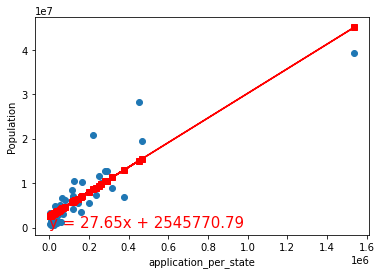

In [22]:
# Print out the r-squared value along with the plot.
x_values = census_patent['application_per_state']
y_values = census_patent['Population']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-", marker="s") # means I want a line red, with regress_values
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('application_per_state')
plt.ylabel('Population')
plt.savefig(f"all_inventors_1")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.010296617369985257


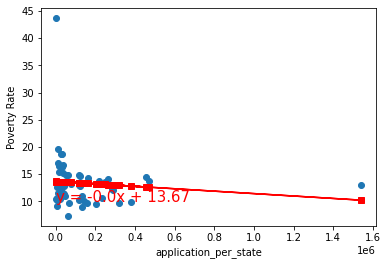

In [23]:
# Print out the r-squared value along with the plot.
x_values = census_patent['application_per_state']
y_values = census_patent['Poverty Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-", marker="s") # means I want a line red, with regress_values
plt.annotate(line_eq,(60,10),fontsize=15,color="red")
plt.xlabel('application_per_state')
plt.ylabel('Poverty Rate')
plt.savefig(f"all_inventors_2")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.056195031892592354


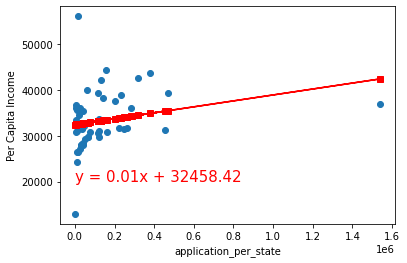

In [24]:
# Print out the r-squared value along with the plot.
x_values = census_patent['application_per_state']
y_values = census_patent['Per Capita Income']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-", marker="s") # means I want a line red, with regress_values
plt.annotate(line_eq,(60,20000),fontsize=15,color="red")
plt.xlabel('application_per_state')
plt.ylabel('Per Capita Income')
plt.savefig(f"all_inventors_3")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0062013326435580935


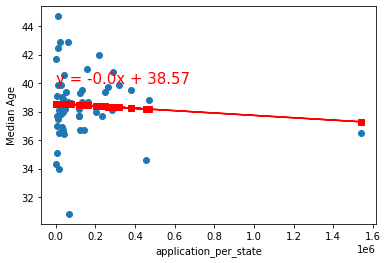

In [25]:
# Print out the r-squared value along with the plot.
x_values = census_patent['application_per_state']
y_values = census_patent['Median Age']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-", marker="s") # means I want a line red, with regress_values
plt.annotate(line_eq,(60,40),fontsize=15,color="red")
plt.xlabel('application_per_state')
plt.ylabel('Median Age')
plt.savefig(f"all_inventors_4")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.008113933112090124


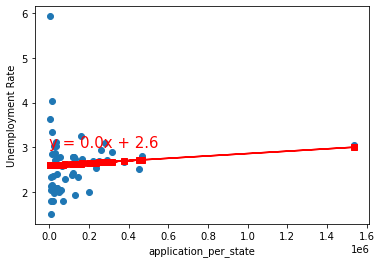

In [26]:
# Print out the r-squared value along with the plot.
x_values = census_patent['application_per_state']
y_values = census_patent['Unemployment Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-", marker="s") # means I want a line red, with regress_values
plt.annotate(line_eq,(60,3),fontsize=15,color="red")
plt.xlabel('application_per_state')
plt.ylabel('Unemployment Rate')
plt.savefig(f"all_inventors_5")
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [27]:
centroids = pd.read_csv("csv_patent_2019/state_centroids.csv")
centroids = centroids.rename(columns = {'State':'Name'})
centroids.head()

,Name,Latitude,Longitude
0,Alabama,32.7794,-86.8287
1,Alaska,64.0685,-152.2782
2,Arizona,34.2744,-111.6602
3,Arkansas,34.8938,-92.4426
4,California,37.1841,-119.4696


In [28]:
census_patent.head()

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,application_per_state
0,01,Alabama,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,2.708946,30196
1,02,Alaska,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,3.637114,3285
2,04,Arizona,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,2.778676,117409
3,05,Arkansas,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,2.349860,16464
4,06,California,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,3.052765,1537090


In [29]:
# Have an inner merge for census and patent applications DataFrame above

census_patent_coord = pd.merge(census_patent, centroids, on=["Name"])
census_patent_coord.head()

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,application_per_state,Latitude,Longitude
0,01,Alabama,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,2.708946,30196,32.7794,-86.8287
1,02,Alaska,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,3.637114,3285,64.0685,-152.2782
2,04,Arizona,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,2.778676,117409,34.2744,-111.6602
3,05,Arkansas,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,2.349860,16464,34.8938,-92.4426
4,06,California,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,3.052765,1537090,37.1841,-119.4696


In [30]:
# Store latitude and longitude in locations
locations = census_patent_coord[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
rating = census_patent_coord['application_per_state']

In [31]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=1537090,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))